# AirBnB Reviews Topic Modelling: Adjectives

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Load Data

In [2]:
def load_review_data(directory):
    """Load Review Data"""
    reviews_df = pd.read_csv(directory + 'interim/review_wrangled.csv', sep=';', lineterminator='\n').drop(columns=['Unnamed: 0'])
    
    return reviews_df

In [7]:
# Select City
country = 'united-states'
city = 'san-francisco'

# Directory
directory = '../data/' + country + '/' + city + '/'

#
reviews_df = load_review_data(directory)

In [9]:
reviews_df.head(3)

,listing_id,id,date,comments,tokens,tokens_count,name_entities,name_entities_count,comments_no_ne,no_ne_tokens,no_ne_tokens_count,nouns,nouns_counts,verbs,verbs_counts,adjectives,adjectives_counts
0,958,5977,2009-07-23,"Our experience was, without a doubt, a five st...","['experience', 'without', 'doubt', 'five', 'st...",47,"['David', 'Haight', 'Castro', 'Golden Gate Par...",5,"Our experience was, without a doubt, a five st...","['experience', 'without', 'doubt', 'five', 'st...",39,"['experience', 'doubt', 'star', 'experience', ...",30,"[u'be', u'be', 'accomodating', u'honor', u'be'...",10,"['consummate', 'full', 'perfect', 'full', 'clo...",6
1,958,6660,2009-08-03,Returning to San Francisco is a rejuvenating t...,"['returning', 'san', 'francisco', 'rejuvenatin...",36,"['San Francisco', 'Holly', 'David']",3,Returning to is a rejuvenating thrill but thi...,"['returning', 'rejuvenating', 'thrill', 'time'...",32,"['san', 'francisco', 'rejuvenating', 'thrill',...",19,"[u'return', u'be', u'be', u'enhance', u'renova...",14,"['great', 'local', 'such', 'amenable']",4
2,958,11519,2009-09-27,We were very pleased with the accommodations a...,"['pleased', u'accommodation', 'friendly', 'nei...",67,"['David', 'Haight Street', 'Castro Street']",3,We were very pleased with the accommodations a...,"['pleased', u'accommodation', 'friendly', 'nei...",62,"[u'accommodation', 'neighborhood', 'bed', 'fut...",41,"[u'be', u'be', 'make', u'be', u'have', u'be', ...",21,"['pleased', 'friendly', 'able', 'second', 'hel...",16


## Clean Data

In [5]:
import ast

"""List Strings to List"""
reviews_df['tokens'] = reviews_df['tokens'].map(lambda x: ast.literal_eval(x))
reviews_df['name_entities'] = reviews_df['name_entities'].map(lambda x: ast.literal_eval(x))
reviews_df['no_ne_tokens'] = reviews_df['no_ne_tokens'].map(lambda x: ast.literal_eval(x))
reviews_df['nouns'] = reviews_df['nouns'].map(lambda x: ast.literal_eval(x))
reviews_df['verbs'] = reviews_df['verbs'].map(lambda x: ast.literal_eval(x))
reviews_df['adjectives'] = reviews_df['adjectives'].map(lambda x: ast.literal_eval(x))

# EDA

6.278449164907934

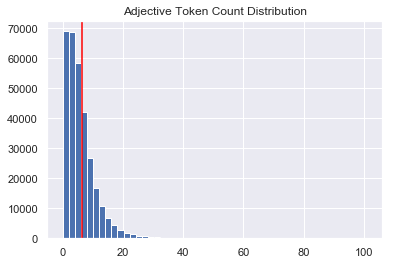

In [24]:
"""Distribution of Adjective Token Counts"""
_ = reviews_df['adjectives_counts'].hist(bins=50)
_ = plt.axvline(np.mean(reviews_df['adjectives_counts']), color='red')
_ = plt.title('Adjective Token Count Distribution')
np.mean(reviews_df['adjectives_counts'])

# Topic Modelling

In [28]:
from gensim.models.ldamulticore import LdaMulticore
from gensim.corpora.dictionary import Dictionary
import time

from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamulticore import LdaMulticore
import time
ldam = LdaMulticore

# LDA Model Inputs
num_topics = 50
num_words = 5
passes = 50

# Get Review Tokens
token_texts = list(reviews_df['adjectives_counts'].values)

# Create a corpus from a list of texts
common_dictionary = Dictionary(token_texts)
common_corpus = [common_dictionary.doc2bow(text) for text in token_texts]

# Get Start Time
start_time = time.time()

# LDA Model
ldam_model = ldam(common_corpus, num_topics=num_topics, id2word=common_dictionary, passes=passes)
model_end_time = time.time() # Model End Time

# LDA Results
results = ldam_model.print_topics(num_topics=num_topics, num_words=num_words)
result_time = time.time() # Results Time

# Save Model

In [ ]:
ldam_model.save('../models/ldam_reviews_50topics_5words_50passes_adjectives.model')

# Results

In [26]:
def display_results(results):
    for index, results in results:
        print(str(index) + ': ' + str(', '.join(results.split('"')[1::2])))
        
def display_results_no_duplicates(results):
    all_lists = []
    for index, result in results:
        all_lists = all_lists + result.split('"')[1::2]
    
    # Get Counts of each word
    counts = pd.Series(all_lists).value_counts()
    no_duplicates = counts[counts == 1].index
    
    for index, result in results:
        print(str(index) + ': ' + str(', '.join([word for word in result.split('"')[1::2] if word in no_duplicates])))

## Topic Results: 50 Topics 10 Words 50 Passes

In [33]:
display_results(results)

0: able, cheap, tricky, living, active
1: cool, true, communal, interested, o
2: nice, clean, comfortable, small, few
3: 10-15, smart, attractive, lively, upper
4: large, comfy, second, open, different
5: awesome, ok, exceptional, handy, general
6: est, un, nous, une, n
7: responsive, great, clean, helpful, comfortable
8: due, difficult, una, smooth, es
9: stylish, clean, soft, reasonable, comfortable
10: super, amazing, sweet, clean, adorable
11: helpful, friendly, great, clean, welcoming
12: happy, busy, front, fast, expensive
13: lovely, such, simple, basic, thorough
14: accessible, communicative, walkable, ideal, affordable
15: light, advertised, automated, functional, furnished
16: cozy, peaceful, clean, accommodating, tidy
17: great, clean, comfortable, many, few
18: beautiful, enough, comfortable, delightful, clean
19: check-in, flexible, prompt, less, muni
20: quiet, safe, close, clean, comfortable
21: private, more, own, clean, comfortable
22: other, most, only, same, special


In [16]:
display_results_no_duplicates(results)

0: able, cheap, tricky, living, active
1: cool, true, communal, interested, o
2: nice
3: 10-15, smart, attractive, lively, upper
4: large, comfy, second, open, different
5: awesome, ok, exceptional, handy, general
6: est, un, nous, une, n
7: responsive
8: due, difficult, una, smooth, es
9: stylish, soft, reasonable
10: super, amazing, sweet, adorable
11: friendly, welcoming
12: happy, busy, front, fast, expensive
13: lovely, such, simple, basic, thorough
14: accessible, communicative, walkable, ideal, affordable
15: light, advertised, automated, functional, furnished
16: cozy, peaceful, accommodating, tidy
17: 
18: beautiful, enough, delightful
19: check-in, flexible, prompt, less, muni
20: quiet, safe, close
21: private, more, own
22: other, most, only, same, special
23: wonderful, touristy
24: best, uber, relaxed, much
25: sure, hospitable, fine, single
26: fantastic, first, loft
27: new, fresh, personal, noisy, absolute
28: ready, major, spectacular, recomendable, magical
29: though